<a href="https://colab.research.google.com/github/Rashimanish/-Insurance-Cross-Selling/blob/main/Overview%20%26%20EDA/IC_DATASET_OVERVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES AND LOADING DATA SET**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/INSURANCE/train.csv'

#Read dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


# **DATA SET OVERVIEW**

In [ ]:
df.shape

(11504798, 12)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
df.isna().sum()/len(df)*100

,0
id,0.0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0


*There are no null values in any of variable.*

In [ ]:
df.duplicated().sum()

0

*There are no duplicate records in the datset.*

In [ ]:
#summary statistics for numerical variables
df.describe()[1:].T.style.background_gradient(cmap='Reds', axis=1)

,mean,std,min,25%,50%,75%,max
id,5752398.500000,3321149.255474,0.000000,2876199.250000,5752398.500000,8628597.750000,11504797.000000
Age,38.383563,14.993459,20.000000,24.000000,36.000000,49.000000,85.000000
Driving_License,0.998022,0.044431,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,26.418690,12.991590,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,0.462997,0.498629,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,30461.370411,16454.745205,2630.000000,25277.000000,31824.000000,39451.000000,540165.000000
Policy_Sales_Channel,112.425442,54.035708,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,163.897744,79.979531,10.000000,99.000000,166.000000,232.000000,299.000000
Response,0.122997,0.328434,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
#unique values in cols
feature_info = {
    'feature': [],
    'unique_val': [],
    'unique_values': []
}

for column in df.columns:
    unique_vals = df[column].unique()
    feature_info['feature'].append(column)
    feature_info['unique_val'].append(len(unique_vals))
    feature_info['unique_values'].append(sorted(unique_vals))

features = pd.DataFrame(feature_info)
features.set_index('feature', inplace=True)
features = features.sort_values(by='unique_val', ascending=False)

features

,unique_val,unique_values
feature,,
id,11504798,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Annual_Premium,51728,"[2630.0, 2642.0, 2698.0, 2730.0, 2738.0, 2739...."
Vintage,290,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2..."
Policy_Sales_Channel,152,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
Age,66,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3..."
Region_Code,54,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
Vehicle_Age,3,"[1-2 Year, < 1 Year, > 2 Years]"
Gender,2,"[Female, Male]"
Driving_License,2,"[0, 1]"


In [ ]:
# summary statistics for categorical variables
df.describe(include='object')


,Gender,Vehicle_Age,Vehicle_Damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


In [ ]:
df['Response'].value_counts()

,count
Response,
0,10089739
1,1415059


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,6228134
Female,5276664


In [ ]:
df['Vehicle_Age'].value_counts()

,count
Vehicle_Age,
1-2 Year,5982678
< 1 Year,5044145
> 2 Years,477975


In [ ]:
df['Vehicle_Damage'].value_counts()

,count
Vehicle_Damage,
Yes,5783229
No,5721569


# **EDA PART ONE**

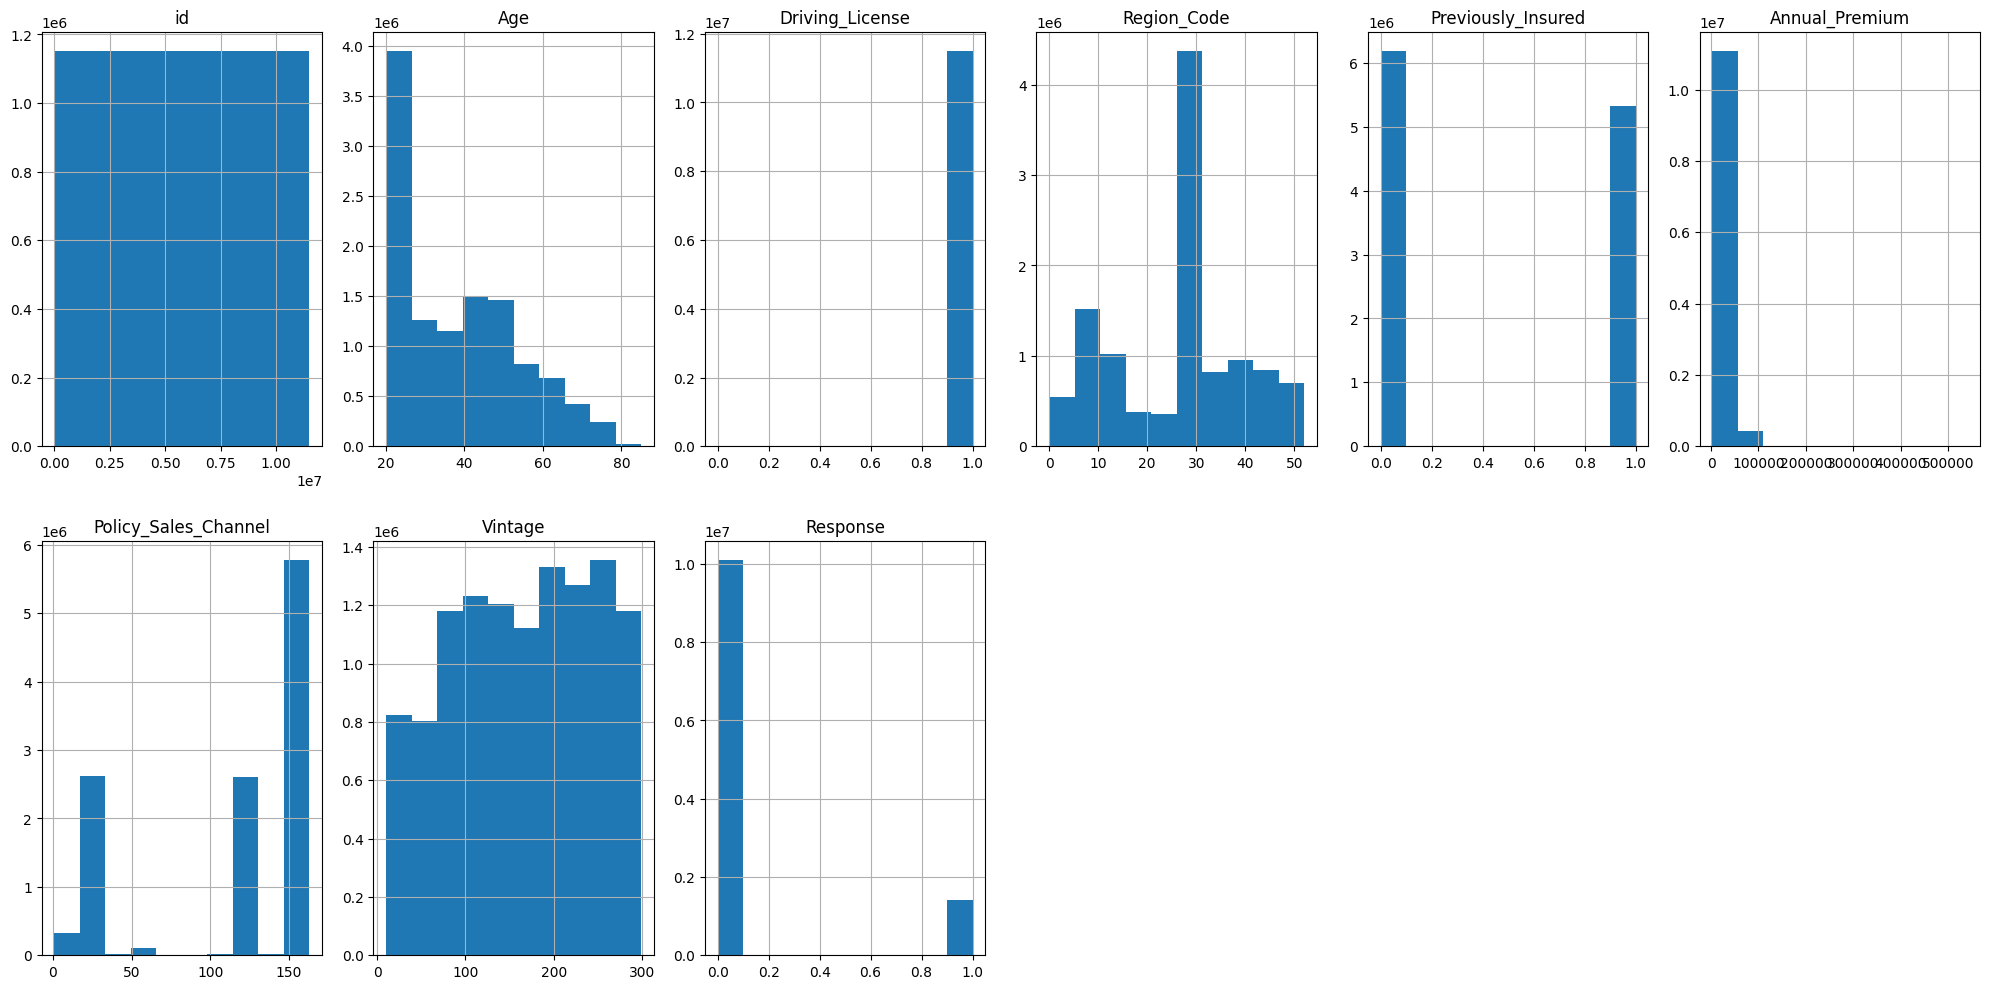

In [ ]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

*From the above plot we can see that :*

*   Age column is Right-Skewed
*   Diriving_license column has unbalanced ratio between the categories



<ipython-input-15-2dd0932b98c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Response', data=df, palette=colors)


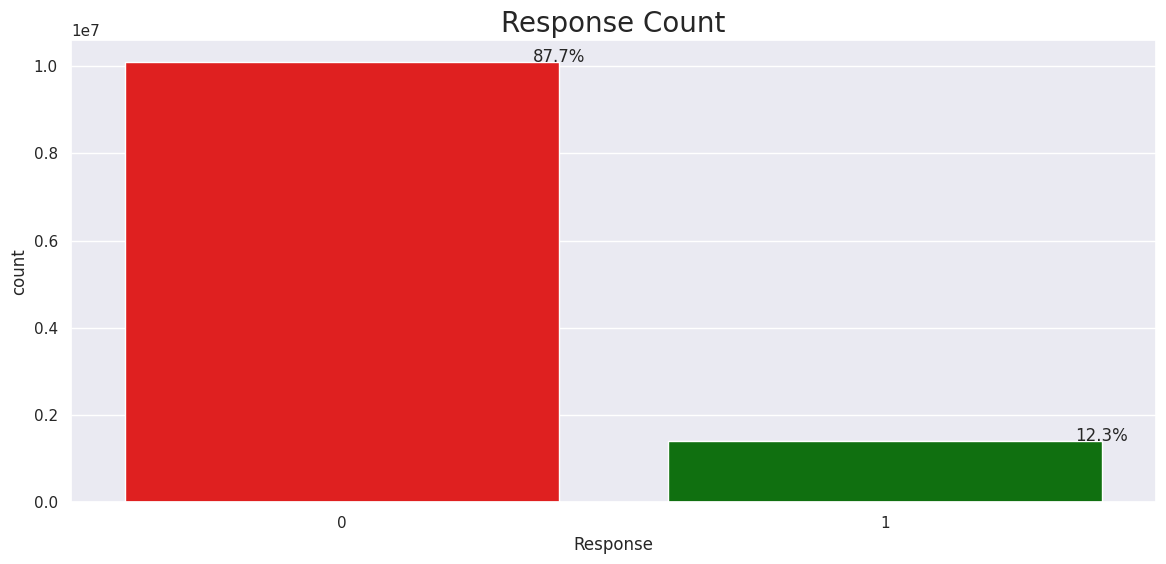

In [ ]:
sns.set(style="darkgrid")
colors = ['red', 'green']
plt.figure(figsize=(14,6))
total = float(len(df))
ax = sns.countplot(x='Response', data=df, palette=colors)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

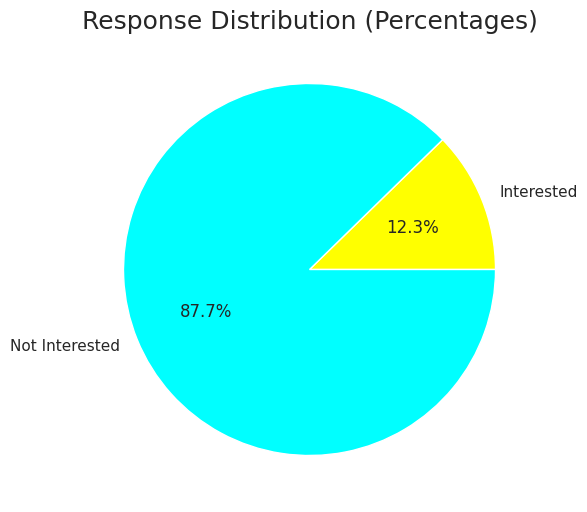

In [ ]:
#pie charts to visualize the percenatage of the responses
positive_percent = len(df[df['Response'] == 1]) / len(df) * 100
negative_percent = len(df[df['Response'] == 0]) / len(df) * 100
percentages = [positive_percent, negative_percent]
plt.figure(figsize=(6,8))
plt.pie(percentages, labels=['Interested', 'Not Interested'], autopct='%.1f%%', colors=['yellow', 'cyan'])
plt.title('Response Distribution (Percentages)', fontsize=18)
plt.show()

*The data is imbalanced where, 87.7% percent of people havenot shown any intrest and 12.3% people have shown interest.*

## **ANALYZING EACH VARIABLE**

# Gender

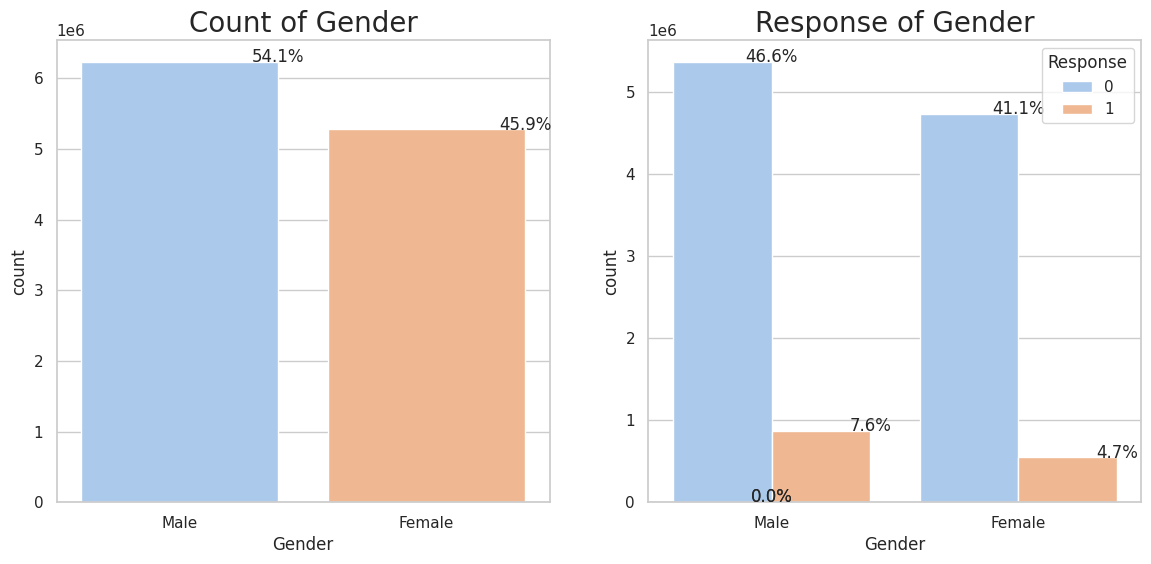

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
total = float(len(df))
ax1 = sns.countplot(x='Gender', hue='Gender', palette="pastel", data=df, legend=False)
plt.title('Count of Gender', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Gender', hue='Response', palette="pastel", data=df)
plt.title('Response of Gender', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()


*   The dataset is nearly evenly split between males and females, with a slight majority of males.

*   While there is a slight difference in insurance interest between genders, the overall trend is more pronounced in the low interest category.

*   The data indicates a general disinterest in vehicle insurance across both genders, with a marginally higher proportion of males expressing interest.








# Driving License

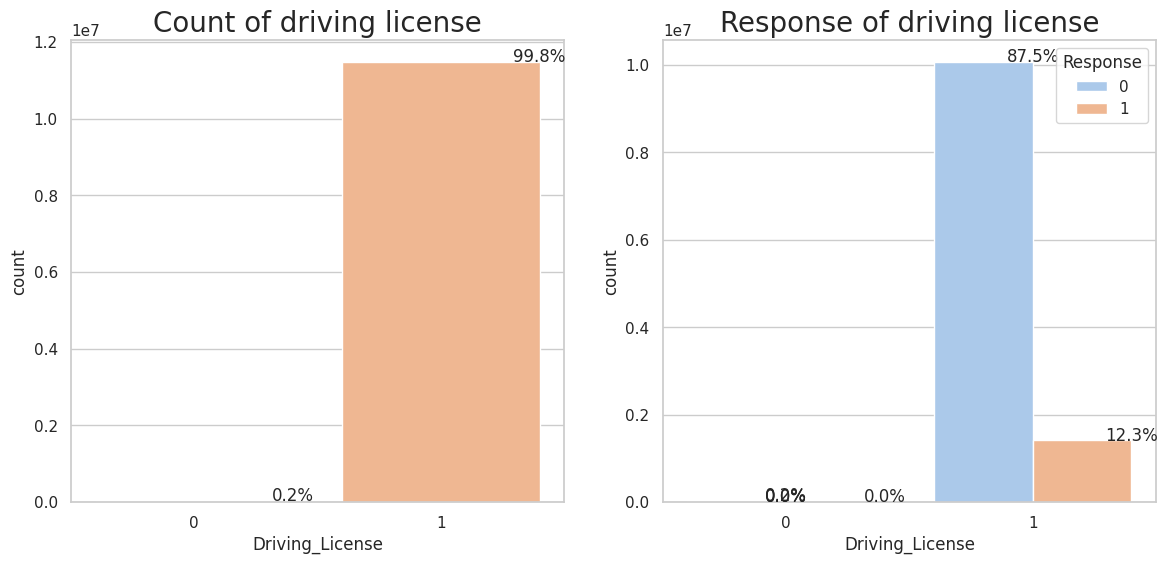

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="whitegrid")
total = float(len(df))
ax1 = sns.countplot(x='Driving_License', hue='Driving_License', palette="pastel", data=df,legend=False)
plt.title('Count of driving license',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="pastel", data=df)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()



*   99.8% of customers have DL, whereas 0.2% do not have DL.

*   Only a small percentage of people who have a DL (12.2%) are interested in buying insurance.



# Age Distribution

<Figure size 1200x500 with 0 Axes>

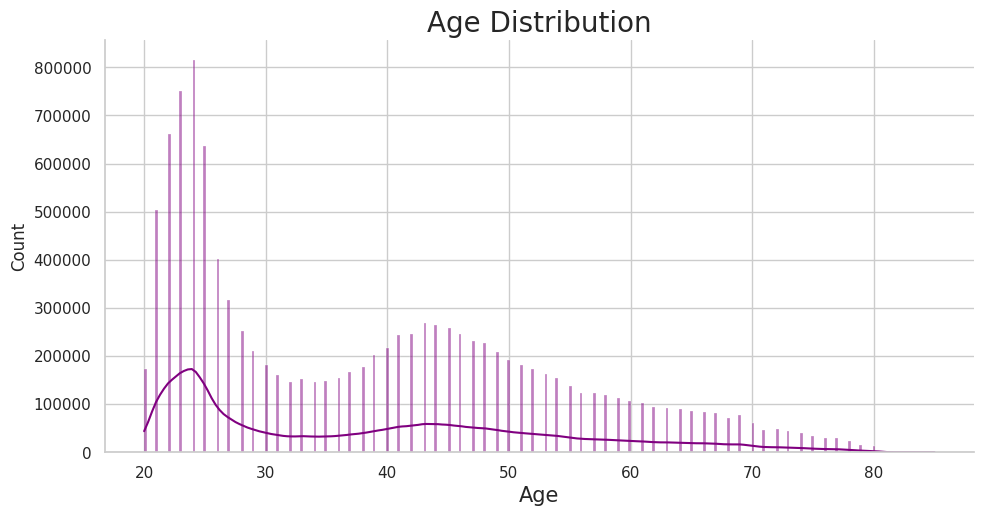

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(df['Age'], kde=True, color='purple', aspect=2)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=20)
plt.show()

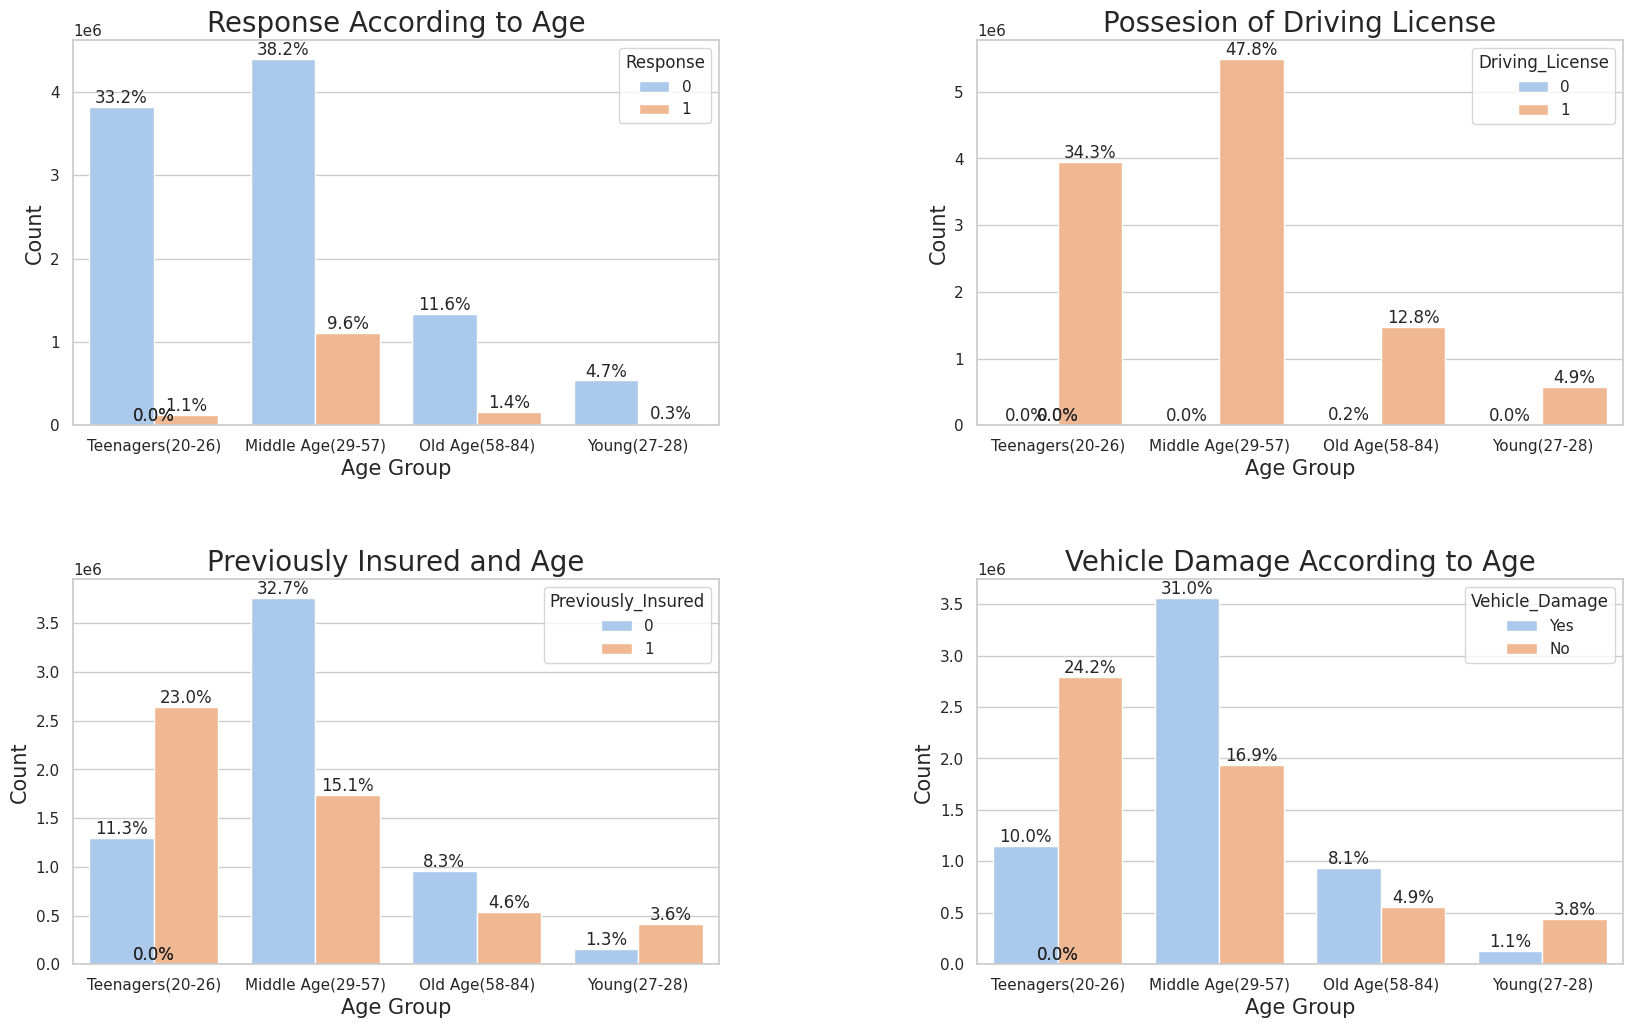

In [ ]:
# Group the ages
df['Ages'] = df['Age']
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Age_label'] = 'Teenagers(20-26)'
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Age_label'] = 'Young(27-28)'
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Age_label'] = 'Middle Age(29-57)'
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Age_label'] = 'Old Age(58-84)'

# Convert to categorical values
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Ages'] = 0
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Ages'] = 1
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Ages'] = 2
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Ages'] = 3
sns.set(style="whitegrid")
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

palette = sns.color_palette("pastel", n_colors=len(df['Response'].unique()))

# Plot 1: Response vs age
total = float(len(df))
sns.countplot(x='Age_label', hue='Response', palette=palette, data=df, ax=axes[0, 0])
axes[0, 0].set_title('Response According to Age', fontsize=20)
axes[0, 0].set_xlabel('Age Group', fontsize=15)
axes[0, 0].set_ylabel('Count', fontsize=15)
for p in axes[0, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0, 0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 2: Driving License vs age
sns.countplot(x='Age_label', hue='Driving_License', palette=palette, data=df, ax=axes[0, 1])
axes[0, 1].set_title('Possesion of Driving License', fontsize=20)
axes[0, 1].set_xlabel('Age Group', fontsize=15)
axes[0, 1].set_ylabel('Count', fontsize=15)
for p in axes[0, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0, 1].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 3: Previously Insured vs age
sns.countplot(x='Age_label', hue='Previously_Insured', palette=palette, data=df, ax=axes[1, 0])
axes[1, 0].set_title('Previously Insured and Age', fontsize=20)
axes[1, 0].set_xlabel('Age Group', fontsize=15)
axes[1, 0].set_ylabel('Count', fontsize=15)
for p in axes[1, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[1, 0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 4: Vehicle Damage according to age
sns.countplot(x='Age_label', hue='Vehicle_Damage', palette=palette, data=df, ax=axes[1, 1])
axes[1, 1].set_title('Vehicle Damage According to Age', fontsize=20)
axes[1, 1].set_xlabel('Age Group', fontsize=15)
axes[1, 1].set_ylabel('Count', fontsize=15)
for p in axes[1, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[1, 1].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()

According to age wise:

*   9.6% of people in their middle age people are interested in purchasing
*   Almost 47.8% of middle-aged individuals have a driver's licence.
*   About 23% of people in their teens have health insurance.

So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

# Previously Insured

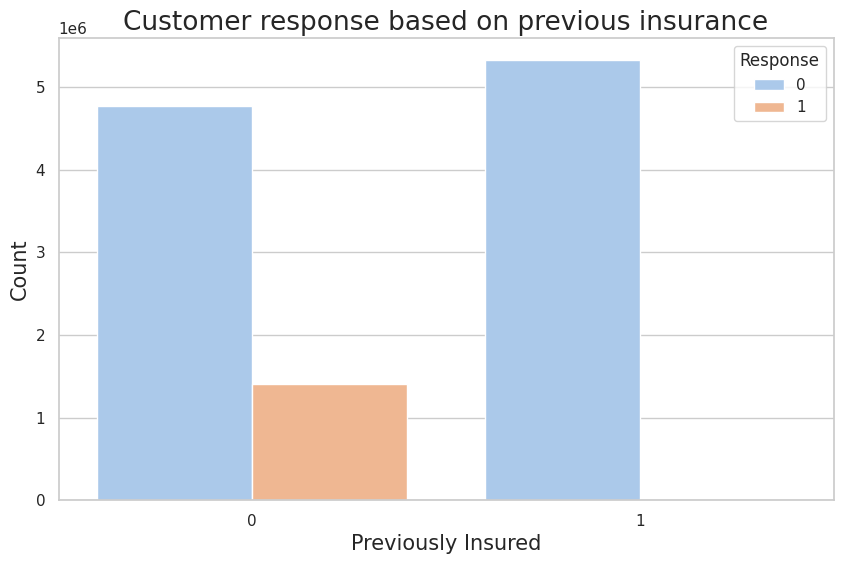

In [ ]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Previously_Insured', hue = 'Response', palette='pastel')
plt.xlabel('Previously Insured', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Customer response based on previous insurance', fontsize = 19)
plt.show()

for customers who already have insurance, taking on another insurance policy can be complex and burdensome

## **Vehicle Damage**

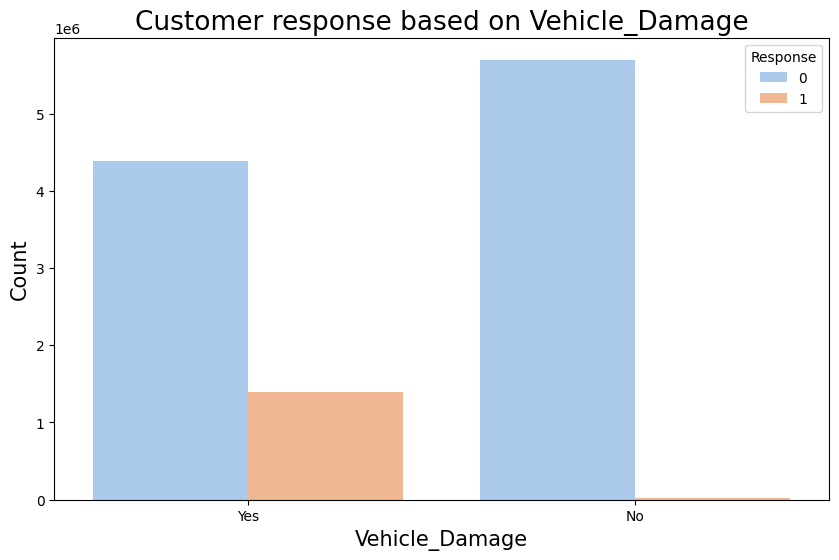

In [ ]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Damage', hue = 'Response', palette='pastel')
plt.xlabel('Vehicle_Damage', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Customer response based on Vehicle_Damage', fontsize = 19)
plt.show()

Customers who have a damaged vehicle tend to take the vehicle insurance

# Vehicle Age

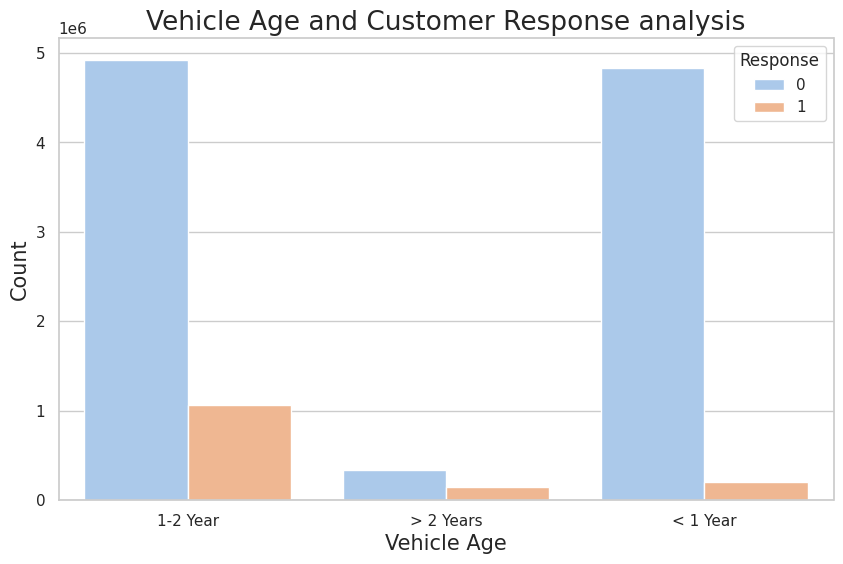

In [ ]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Age', hue = 'Response', palette='pastel')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk

# Annual Premium

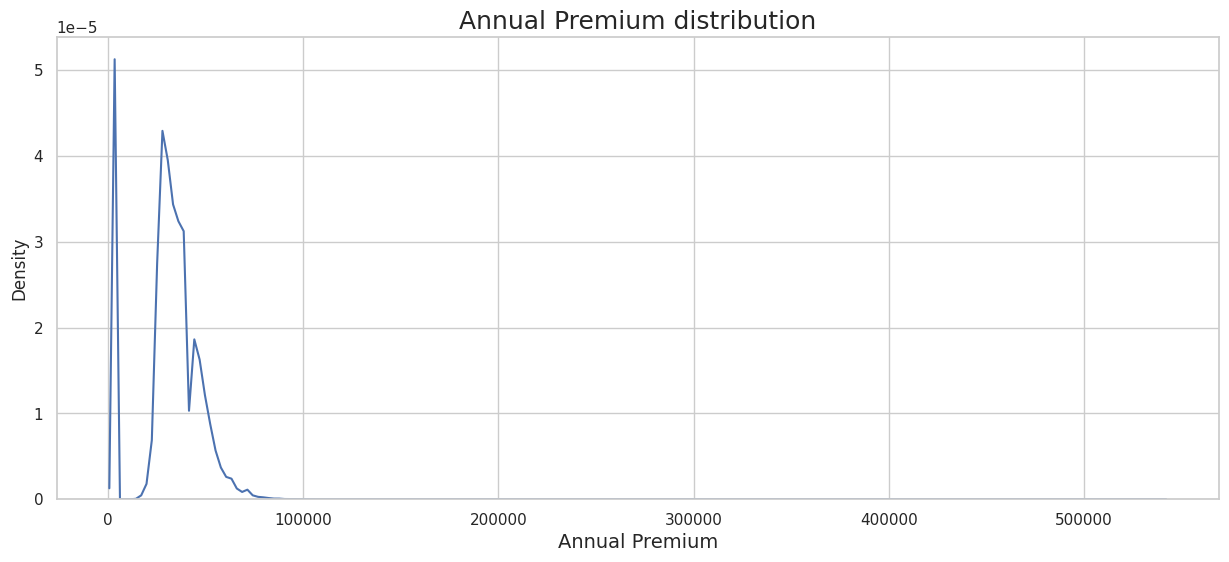

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize = 14)
plt.title('Annual Premium distribution', fontsize = 18)
plt.show()

we can infer that the annual premimum variable is right skewed

# Policy Sales Channel

<Figure size 1200x500 with 0 Axes>

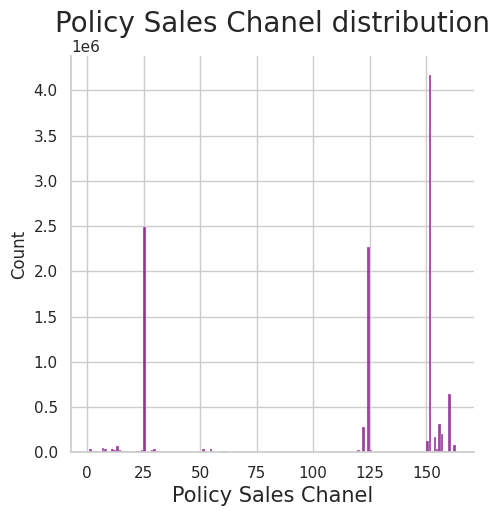

In [ ]:
plt.figure(figsize = (12,5))
sns.displot(df['Policy_Sales_Channel'], kde = False, color = 'purple')
plt.xlabel('Policy Sales Chanel', fontsize = 15)
plt.title('Policy Sales Chanel distribution', fontsize = 20)
plt.show()

Policy Sales Channel number around 152, 26.0 and 124 are the most common policy channels.

# Regional Code Distribution

<Figure size 1200x500 with 0 Axes>

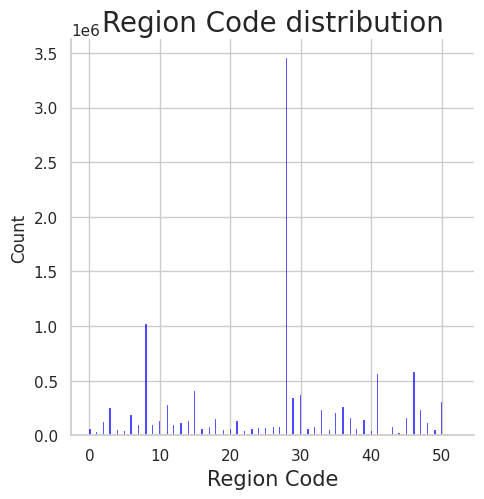

In [ ]:
plt.figure(figsize = (12,5))
sns.displot(df['Region_Code'], kde = False, color = 'blue')
plt.xlabel('Region Code', fontsize = 15)
plt.title('Region Code distribution', fontsize = 20)
plt.show()

Most policy holders of the health insurance company come from 3 region codes, around 8 , 28 and 41

# Vintage

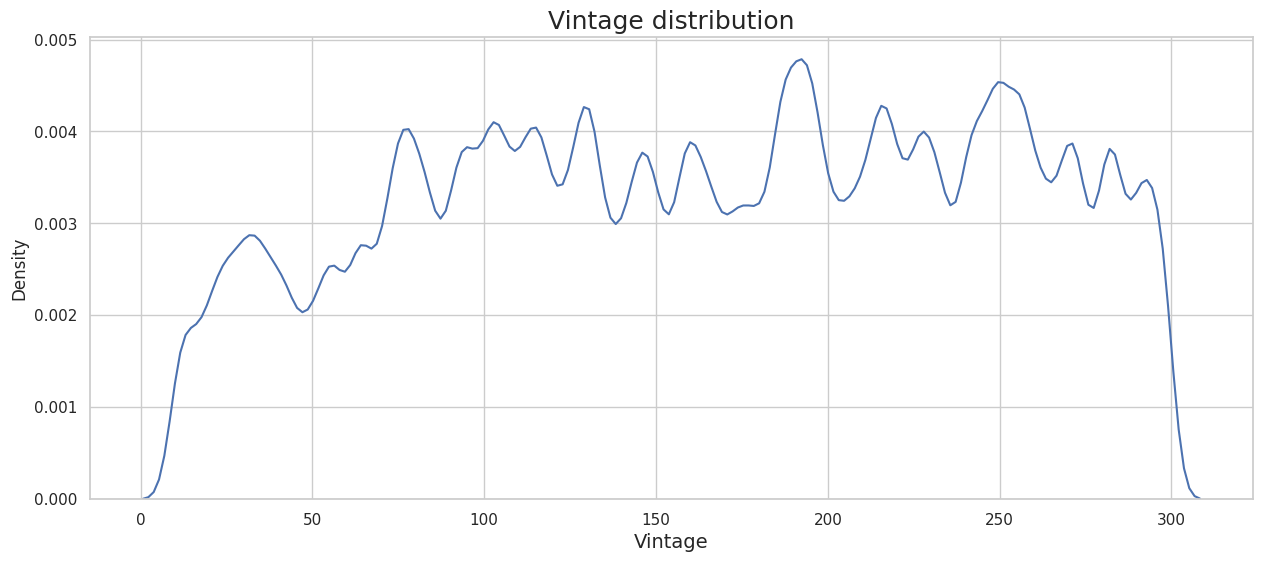

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['Vintage'])
plt.xlabel('Vintage', fontsize = 14)
plt.title('Vintage distribution', fontsize = 18)
plt.show()

Vintage has an almost uniform distribution from above figure

# **EDA PART TWO**

In [ ]:
#Splitting columns to numerical and categorical
numeric_features = ['Age','Annual_Premium', 'Vintage'] # numerical features
cat_encoded_feature = ['Policy_Sales_Channel','Region_Code'] # categorical features that were encoded numerically
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage' ] # categorical features
cat_boolean_features = ['Driving_License','Previously_Insured', 'Response'] # categorical features with boolean values
cat_features = cat_label_features + cat_boolean_features + cat_encoded_feature # all categorical features

# Univariate Analysis

**Distribution Plots**

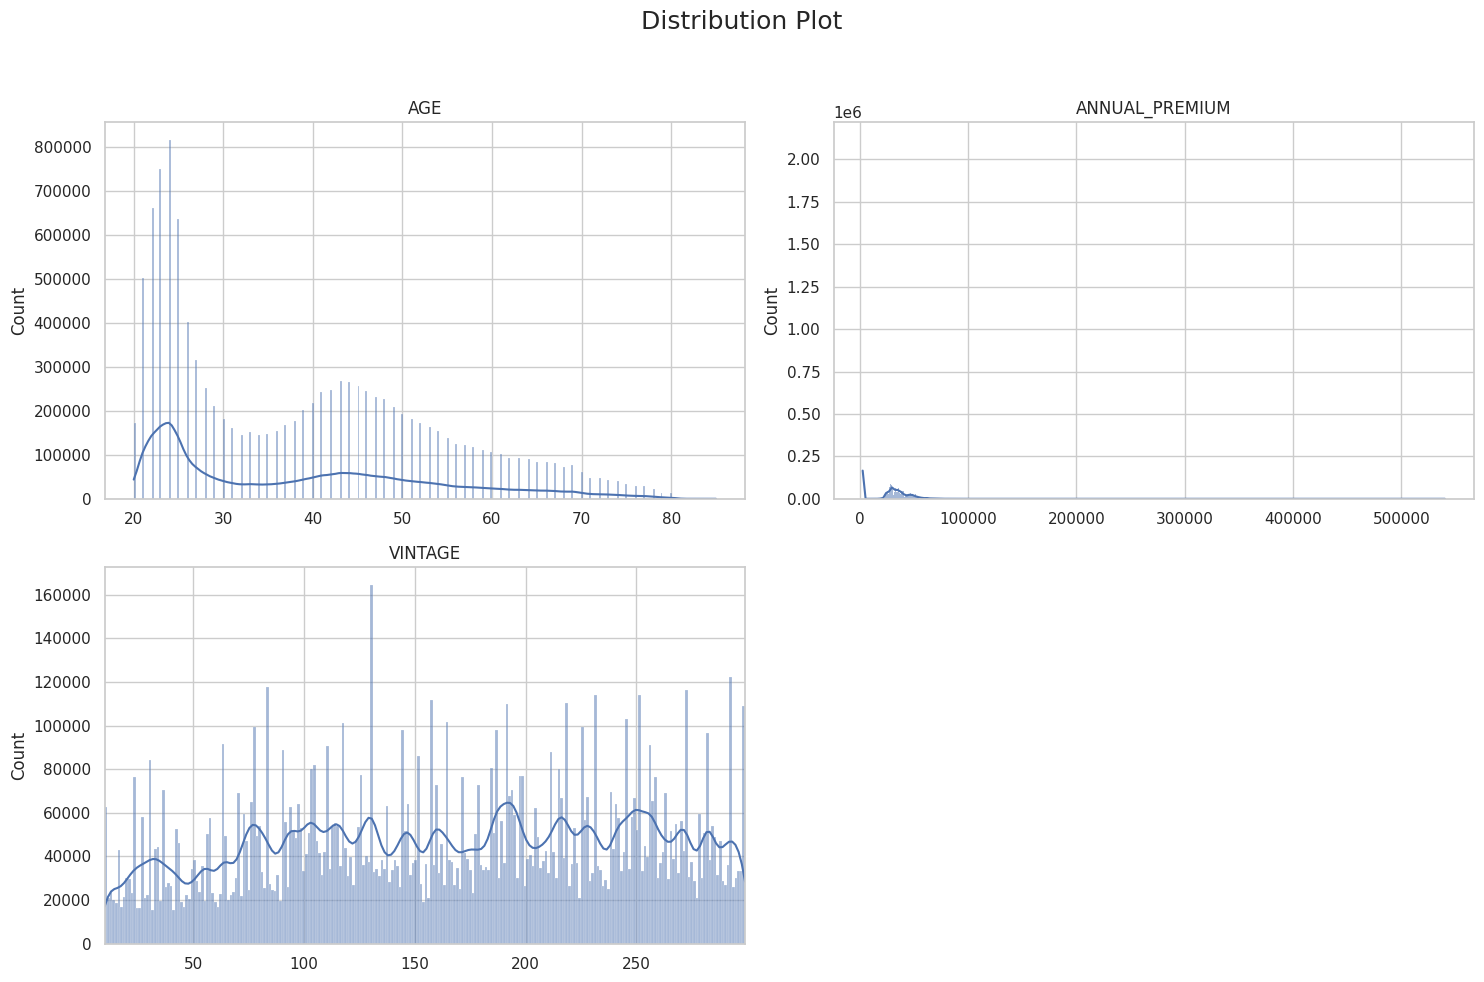

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution Plot", fontsize=18, y=0.98)

# Plot the first two features in the top row
for n in range(2):
    sns.histplot(df[numeric_features[n]], ax=axes[0, n], kde=True)
    axes[0, n].set_title(numeric_features[n].upper())
    axes[0, n].set_xlabel("")

# Plot the third feature in the bottom left position
sns.histplot(df[numeric_features[2]], ax=axes[1, 0], kde=True)
axes[1, 0].set_title(numeric_features[2].upper())
axes[1, 0].set_xlabel("")

# Adjust the x-axis limits to zoom in on "Annual Premium" if that's the third feature
# You can change the limits based on your data range
axes[1, 0].set_xlim([df[numeric_features[2]].min(), df[numeric_features[2]].max()])

# Hide the last subplot (bottom right)
axes[1, 1].axis('off')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

Violin Plot

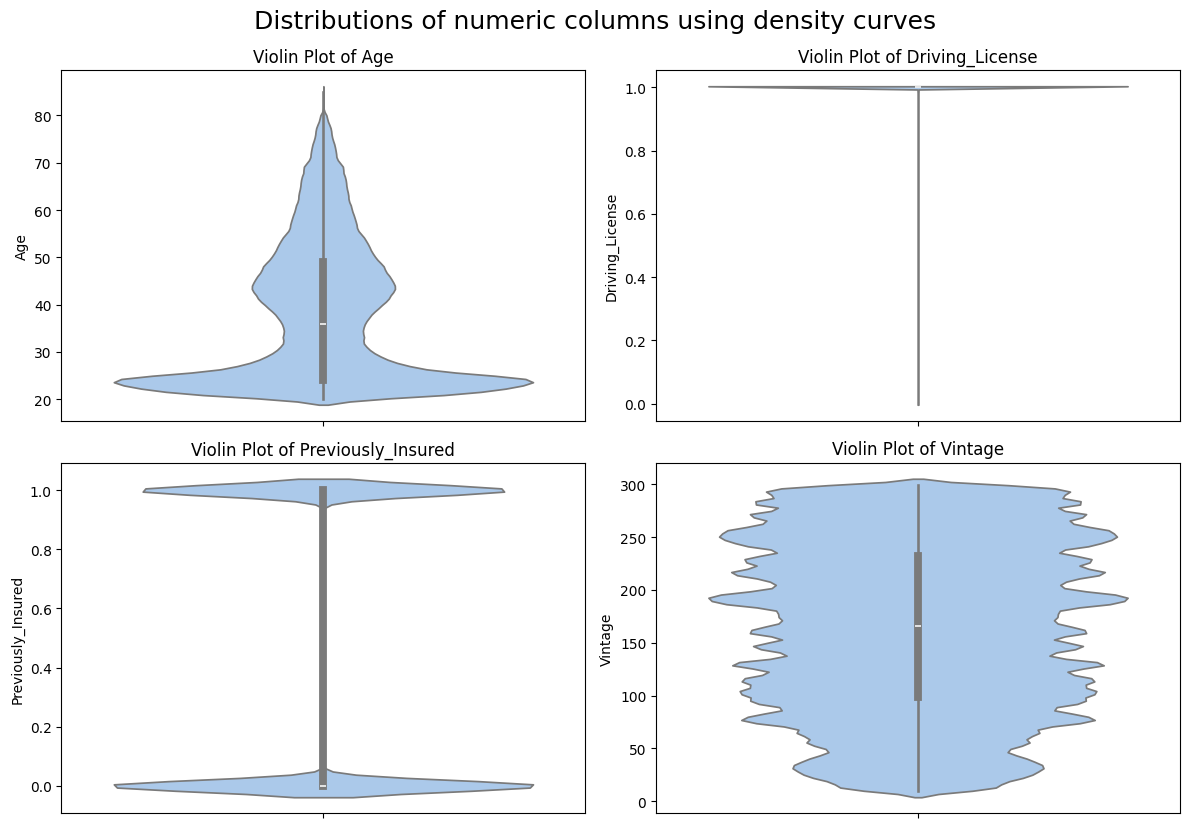

In [ ]:
# Set the pastel color palette
sns.set_palette('pastel')

# Define the features to plot
features = ['Age', 'Driving_License', 'Previously_Insured', 'Vintage']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a subplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(y=df[feature])
    plt.title(f'Violin Plot of {feature}')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Distributions of numeric columns using density curves', y=1.03, fontsize=18)
plt.show()



*  Annual Premium shows near normal distribution
*   The age of a large number of population are in their early twenty's and mid forty's.
*   Vintage --> Policy ages are unevenly distributed, with certain age groups being significantly more prevalent than others.





Box Plot

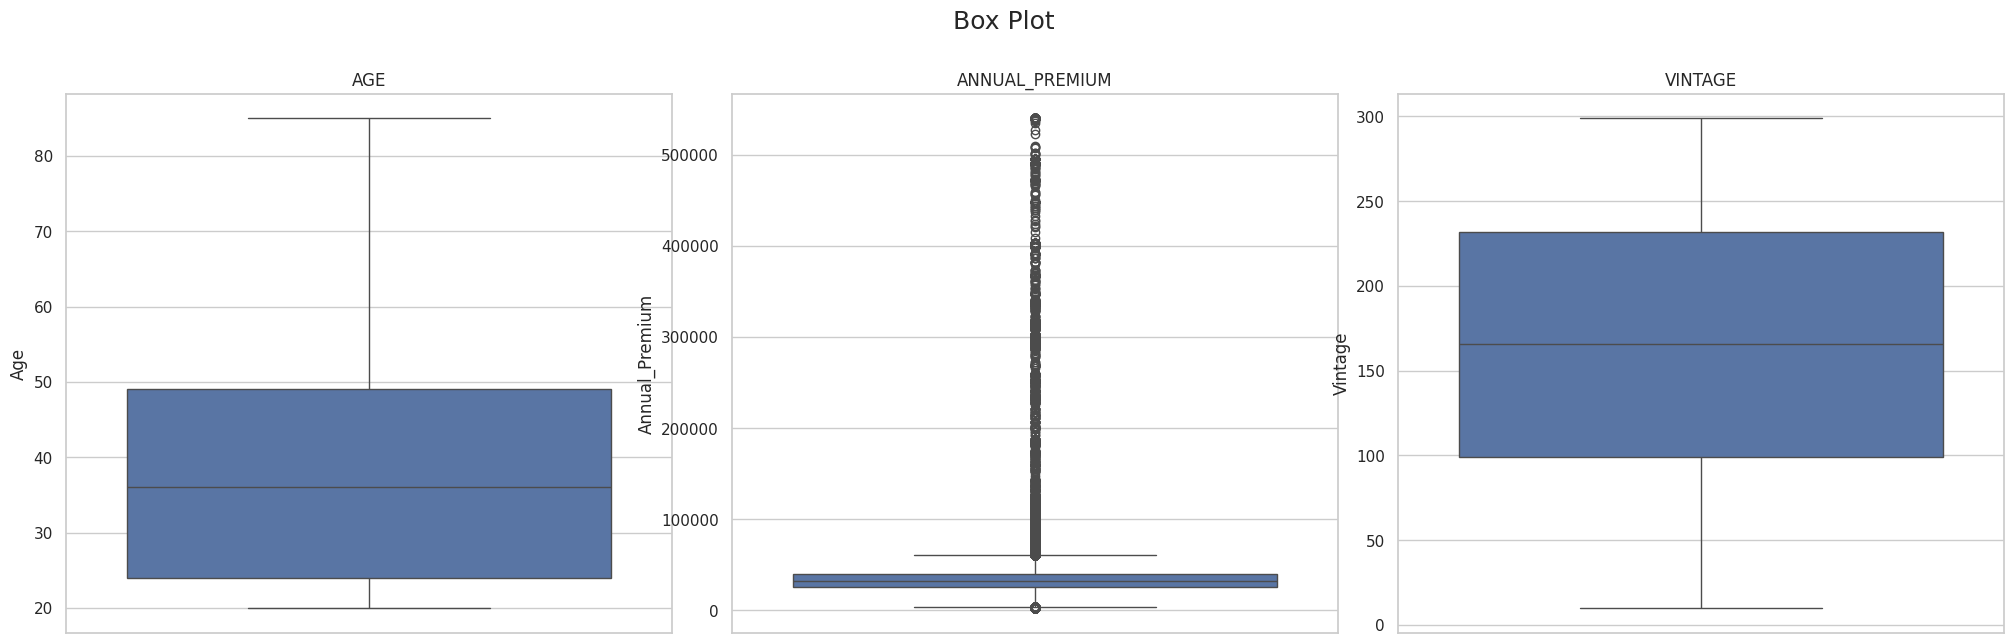

In [ ]:
plt.figure(figsize=(25, 7))
plt.suptitle("Box Plot", fontsize=18, y=1)
for n, ticker in enumerate(numeric_features):
  ax = plt.subplot(1,3, n + 1)
  plt.subplots_adjust(hspace=0.1, wspace=0.1)
  sns.boxplot(df[ticker])
  ax.set_title(ticker.upper())
  ax.set_xlabel("")


*   Annual Premium is the only numerical feature with outliers




Count Plot

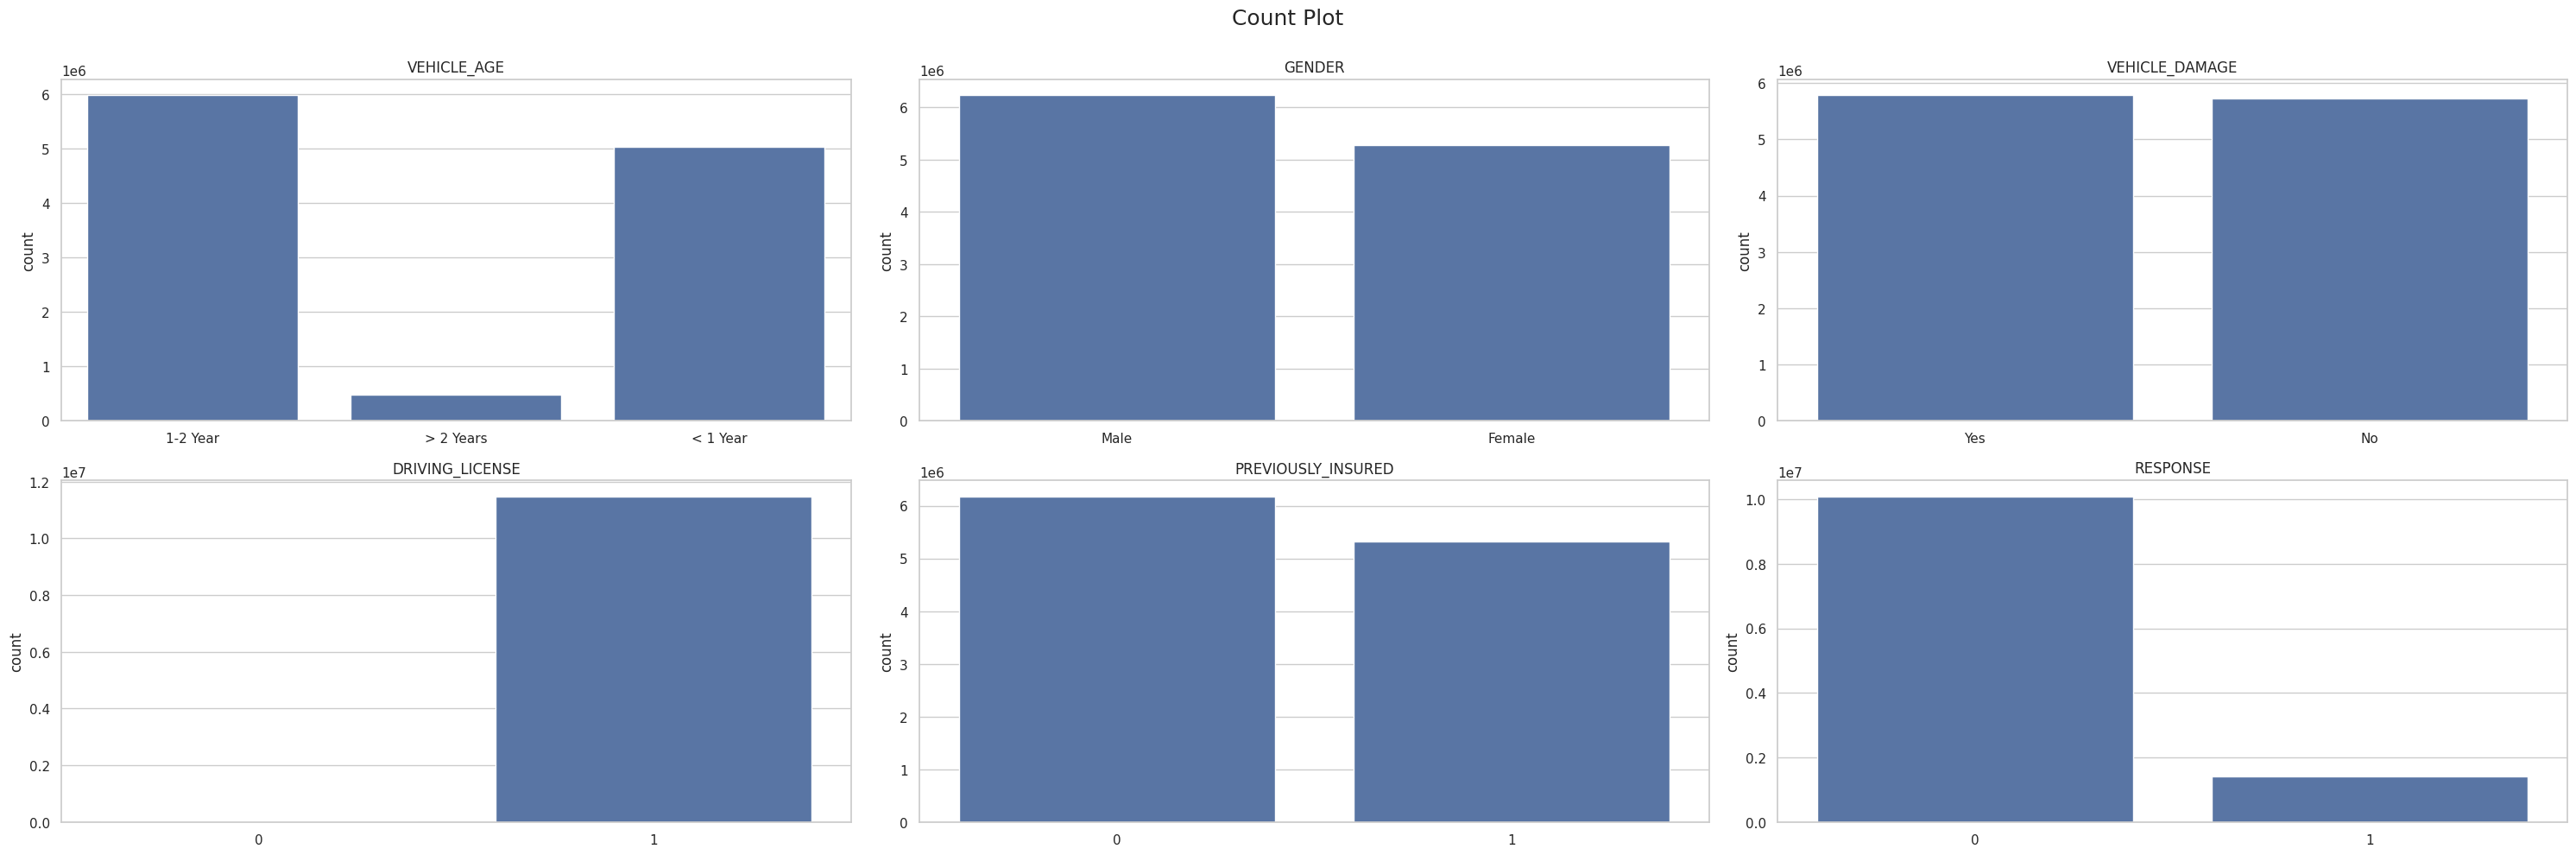

In [ ]:
plt.figure(figsize=(30, 15))
plt.suptitle("Count Plot", fontsize=18, y=0.95)
for n, ticker in enumerate(cat_features[:-2]):
    ax = plt.subplot(3, 3, n + 1)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.countplot(x=df[ticker], ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


*   There is a very low amount of people without driving license
*   The target, Responses, has more negative response than positive responses which indicates that the dataset is IMBALANCED.
*  The population's Vehicle Age lies in the range of 0-2 years. This could be because most people subscribe to insurances succeeding the purchase of a vehicle






# **Bivariate Analysis**

Correlation Heatmap

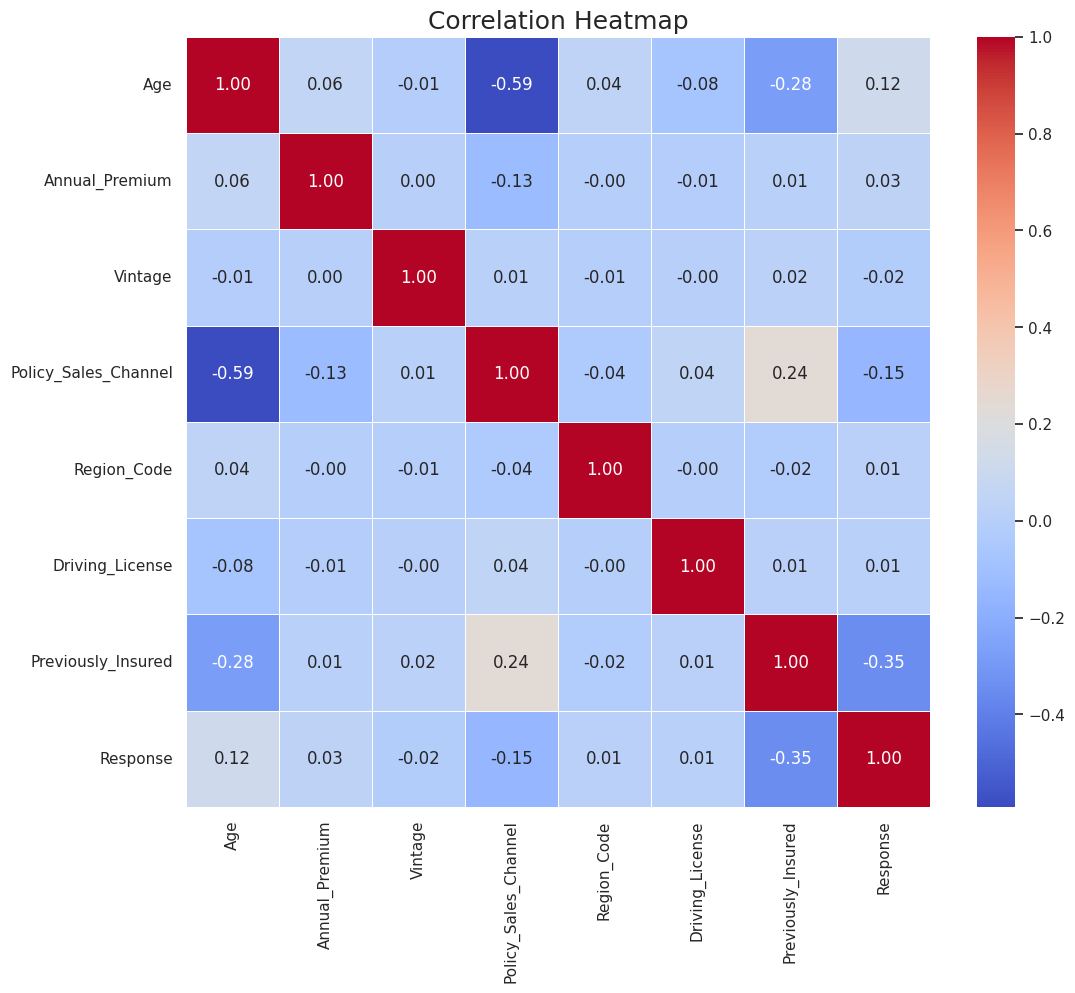

In [ ]:
corr_features = numeric_features + cat_encoded_feature + cat_boolean_features
df_num = df[corr_features]
corr_matrix = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


*   No correlation is observed between numerical features
*   Age and Policy_sales_channel exhibit correlation of -0.58



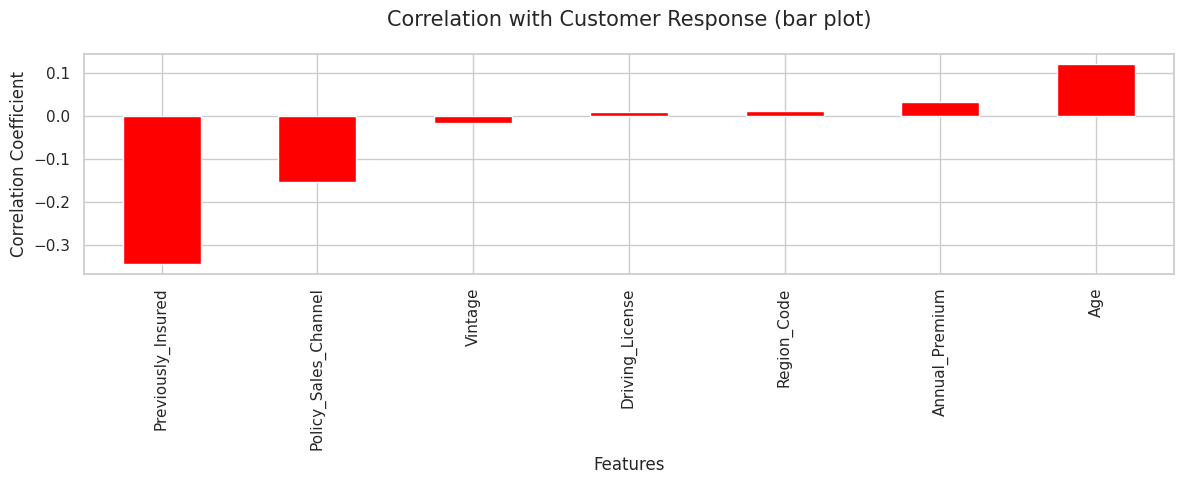

In [ ]:
corr_matrix = df_num.corr()
response_corr = corr_matrix['Response'].drop('Response')
plt.figure(figsize=(12, 5))
response_corr.sort_values().plot(kind='bar', color='red')
plt.title('Correlation with Customer Response (bar plot)', fontsize=15, pad=20)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


*   Vintage column has almost no correlation with Customer Response. That means a customer who is connected to the company for a long time does'nt necessarily mean that he/she will take the vehicle insurance.




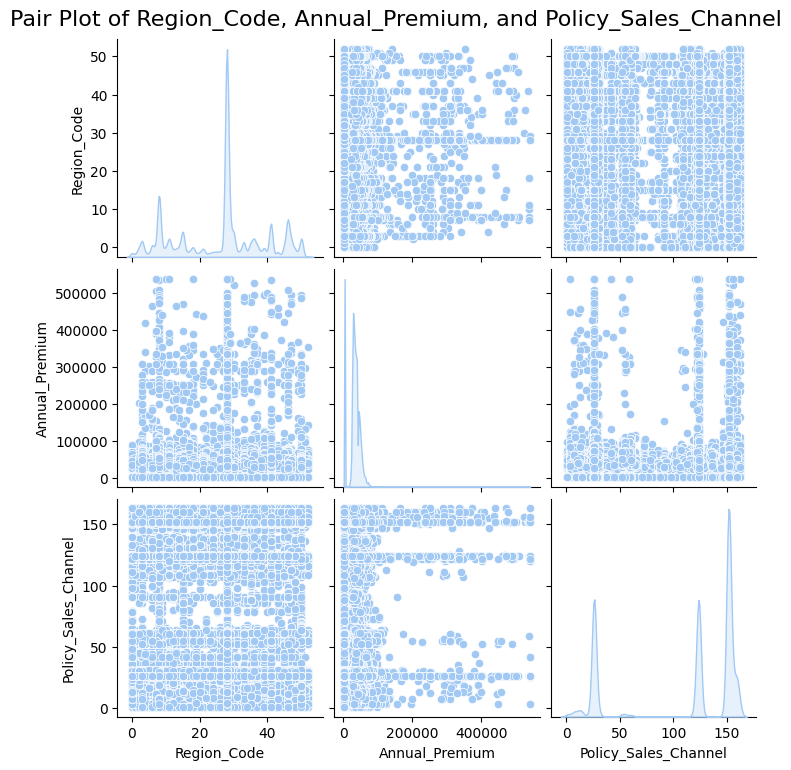

In [ ]:
sns.set_palette('pastel')

# Create the pair plot
pair_plot = sns.pairplot(df[['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']],
                         diag_kind='kde',
                         markers='o')

# Add the title
pair_plot.fig.suptitle('Pair Plot of Region_Code, Annual_Premium, and Policy_Sales_Channel',
                       y=1.02, fontsize=16)

# Show the plot
plt.show()






*   Region Code and Annual Premium: There's a weak link suggesting that higher region codes might correspond to higher premiums, but there's a wide range of premiums in each region.
*   Region Code and Policy Sales Channel: No clear pattern between region and how policies are sold.

*   Annual Premium and Policy Sales Channel: A slight tendency for higher premiums to be linked to specific sales channels, but the connection is weak.
*   The pairplot suggests complex relationships between these factors




Scatter Plot

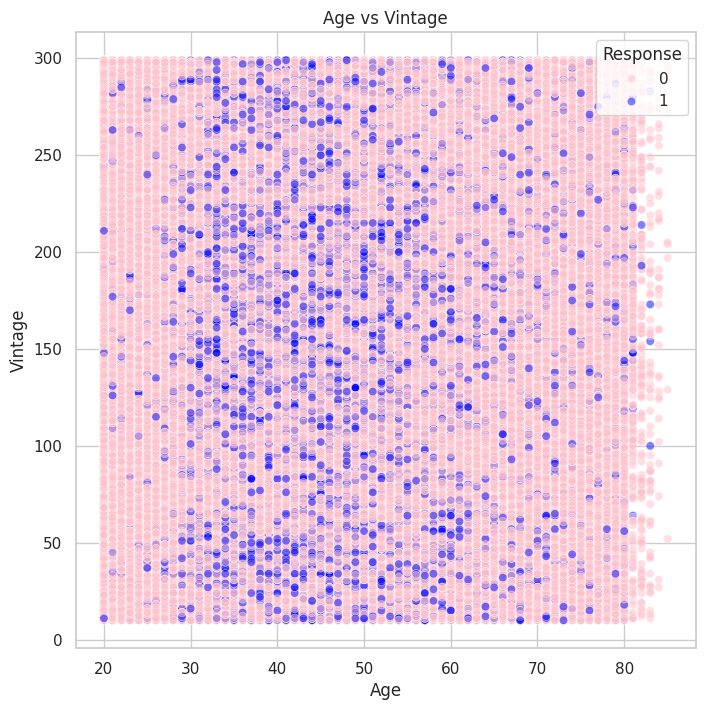

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df['Age'], y=df['Vintage'], hue=df['Response'], alpha=0.5, palette=['pink', 'blue'])
plt.title('Age vs Vintage')
plt.xlabel('Age')
plt.ylabel('Vintage')
plt.legend(title='Response', loc='upper right')
plt.show()

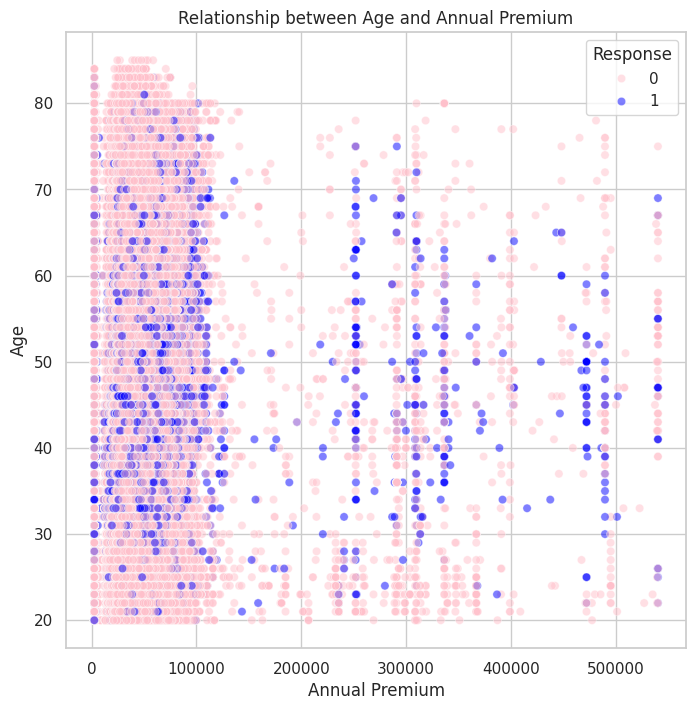

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df['Annual_Premium'], y=df['Age'], hue=df['Response'], alpha=0.5, palette=['pink', 'blue'])
plt.title('Relationship between Age and Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Age')
plt.legend(title='Response', loc='upper right')
plt.show()

*Most postive responders are in between the age of 30 and 65 and earn have an annual premium within $100,000*

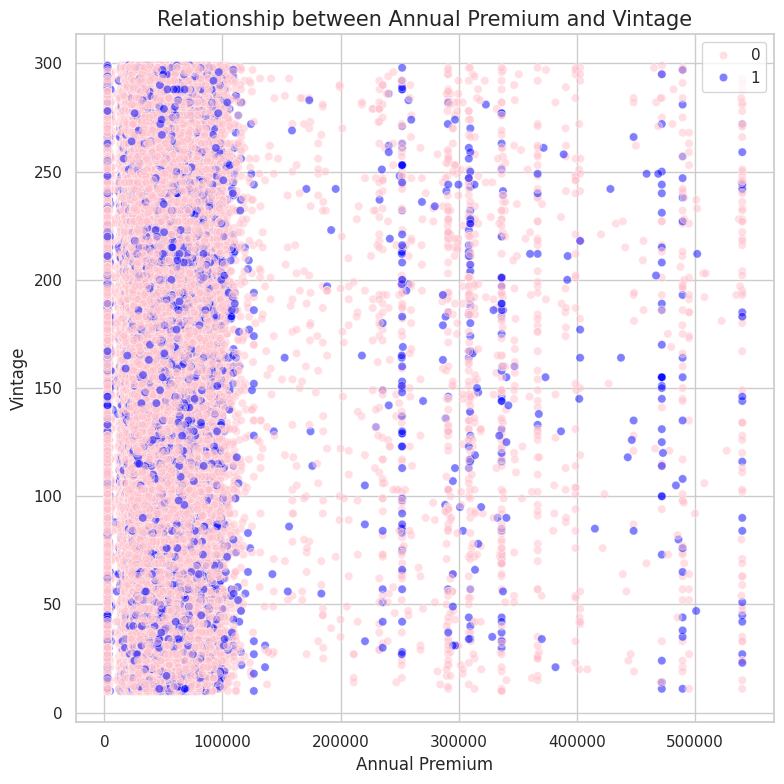

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Annual_Premium', y='Vintage', hue='Response', data=df, alpha=0.5, palette=['pink', 'blue'])
plt.title('Relationship between Annual Premium and Vintage', fontsize=15)
plt.legend(loc='upper right')
plt.xlabel('Annual Premium')
plt.ylabel('Vintage')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = (df.loc[:,numeric_features].copy())
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,4.408165,Age
1,3.571945,Annual_Premium
2,3.684093,Vintage


# Test of Association

In [ ]:
cat_features

['Vehicle_Age',
 'Gender',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response',
 'Policy_Sales_Channel',
 'Region_Code']

In [ ]:
from statsmodels.stats.contingency_tables import Table2x2
from scipy.stats import chi2_contingency

table = {'feature1':[], 'feature2':[], 'Cramers_V_Score':[], 'Interpretation':[]}

for i, ftr1 in enumerate(cat_features):
    for ftr2 in cat_features[i + 1:]:
        # contingency table
        contingency_table = pd.crosstab(df[ftr1], df[ftr2])

        #  Chi-square test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table, correction=False)

        #  Cramér's V
        n = contingency_table.sum().sum()
        phi2 = chi2_stat / n
        k = min(contingency_table.shape) - 1
        cramers_v = np.sqrt(phi2 / k)

        table['feature1'].append(ftr1)
        table['feature2'].append(ftr2)
        table['Cramers_V_Score'].append(cramers_v)

        # Cramér's V score
        if cramers_v > 0.25:
            table['Interpretation'].append("Very Strong")
        elif cramers_v > 0.15:
            table['Interpretation'].append("Strong")
        elif cramers_v > 0.1:
            table['Interpretation'].append("Moderate")
        elif cramers_v > 0.05:
            table['Interpretation'].append("Weak")
        else:
            table['Interpretation'].append("None/Very Weak")

results_df = pd.DataFrame(table)

print(results_df.head())

      feature1            feature2  Cramers_V_Score  Interpretation
0  Vehicle_Age              Gender         0.173813          Strong
1  Vehicle_Age      Vehicle_Damage         0.410536     Very Strong
2  Vehicle_Age     Driving_License         0.039220  None/Very Weak
3  Vehicle_Age  Previously_Insured         0.396958     Very Strong
4  Vehicle_Age            Response         0.231162          Strong


In [ ]:
very_strong= results_df[results_df['Cramers_V_Score'] > 0.25]
very_strong

,feature1,feature2,Cramers_V_Score,Interpretation
1,Vehicle_Age,Vehicle_Damage,0.410536,Very Strong
3,Vehicle_Age,Previously_Insured,0.396958,Very Strong
5,Vehicle_Age,Policy_Sales_Channel,0.625608,Very Strong
6,Vehicle_Age,Region_Code,0.301163,Very Strong
14,Vehicle_Damage,Previously_Insured,0.836214,Very Strong
15,Vehicle_Damage,Response,0.359780,Very Strong
16,Vehicle_Damage,Policy_Sales_Channel,0.467626,Very Strong
22,Previously_Insured,Response,0.345930,Very Strong
23,Previously_Insured,Policy_Sales_Channel,0.456316,Very Strong
25,Response,Policy_Sales_Channel,0.271689,Very Strong


In [ ]:
strong = results_df[results_df['Interpretation'] == 'Strong']
strong

,feature1,feature2,Cramers_V_Score,Interpretation
0,Vehicle_Age,Gender,0.173813,Strong
4,Vehicle_Age,Response,0.231162,Strong
11,Gender,Policy_Sales_Channel,0.193976,Strong
17,Vehicle_Damage,Region_Code,0.244676,Strong
24,Previously_Insured,Region_Code,0.247573,Strong
26,Response,Region_Code,0.150370,Strong
27,Policy_Sales_Channel,Region_Code,0.150831,Strong


In [ ]:
moderate = results_df[results_df['Interpretation'] == 'Moderate']
moderate

,feature1,feature2,Cramers_V_Score,Interpretation


In [ ]:
weak = results_df[results_df['Interpretation'] == 'Weak']
weak

,feature1,feature2,Cramers_V_Score,Interpretation
7,Gender,Vehicle_Damage,0.096989,Weak
9,Gender,Previously_Insured,0.087614,Weak
10,Gender,Response,0.055212,Weak
12,Gender,Region_Code,0.071580,Weak
20,Driving_License,Policy_Sales_Channel,0.051191,Weak


In [ ]:
nw = results_df[results_df['Interpretation'] == 'None/Very Weak']
print(nw)

           feature1            feature2  Cramers_V_Score  Interpretation
2       Vehicle_Age     Driving_License         0.039220  None/Very Weak
8            Gender     Driving_License         0.018702  None/Very Weak
13   Vehicle_Damage     Driving_License         0.015563  None/Very Weak
18  Driving_License  Previously_Insured         0.013733  None/Very Weak
19  Driving_License            Response         0.009197  None/Very Weak
21  Driving_License         Region_Code         0.023674  None/Very Weak


In [ ]:
sorted_by_feature2 = results_df[results_df['feature2'] == 'Response'].sort_values('Cramers_V_Score', ascending=False)
sorted_by_feature2

,feature1,feature2,Cramers_V_Score,Interpretation
15,Vehicle_Damage,Response,0.359780,Very Strong
22,Previously_Insured,Response,0.345930,Very Strong
4,Vehicle_Age,Response,0.231162,Strong
10,Gender,Response,0.055212,Weak
19,Driving_License,Response,0.009197,None/Very Weak


In [ ]:
sorted_by_feature1 = results_df[results_df['feature1'] == 'Response'].sort_values('Cramers_V_Score', ascending=False)
sorted_by_feature1

,feature1,feature2,Cramers_V_Score,Interpretation
25,Response,Policy_Sales_Channel,0.271689,Very Strong
26,Response,Region_Code,0.150370,Strong


Upon Chi Square testing of categorical variables, we observe.
*  Vehicle Age has a strong statistical relationships with all features and target.
*   Vehicle_Damage , Previously_Insured, Policy Sales Channel have very strong and Vehicle_Age has strong association with the target variable

*   Driving_License appears to have no or very weak statistical relationship on any other features or the target




